Basic Forecasting using the statsmodel library - specifically using the ARIMA (AutoRegressive Integrated Moving Average) approach

In [71]:
# Import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [72]:
# Read CPI data
df = pd.read_csv('CPIH_INDEX_Monthly.csv')

In [73]:
# Extract dates and CPI values
dates = df["Date"]
values = df["Value"]
data = pd.DataFrame({'ds': dates, 'y': values})

In [74]:
# Fit ARIMA model
model = ARIMA(data['y'], order=(24, 2, 6))  
# ARIMA(p=no. of lag variable considered, d=differencing, q=moving average) ord

result = model.fit()

c:\Users\elian\anaconda3\envs\mac_workshop\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\elian\anaconda3\envs\mac_workshop\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [75]:
# Forecast
forecast_steps = 10  # Forecasting 5 months ahead
forecast = result.forecast(steps=forecast_steps)

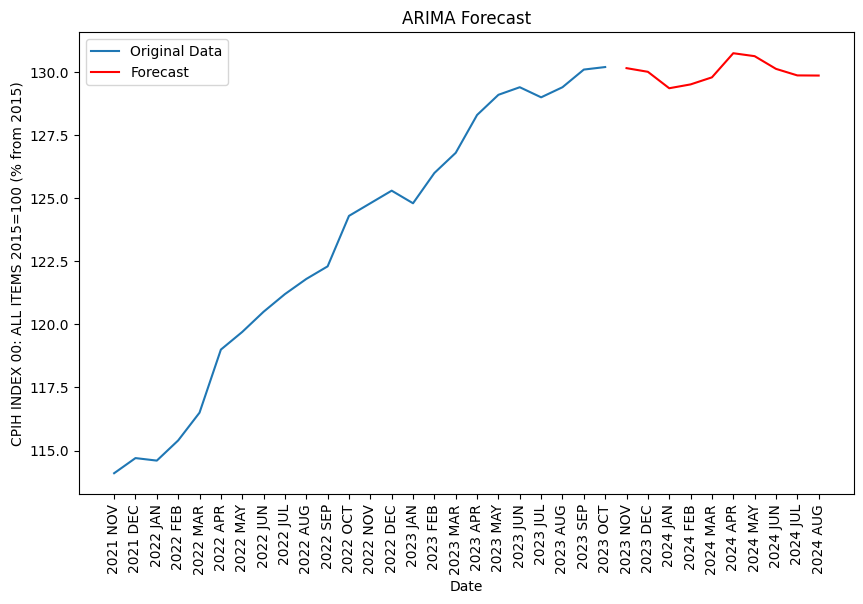

In [76]:
# Create dates for the forecast period
future_dates = ['2023 NOV',
                '2023 DEC',
                '2024 JAN',
                '2024 FEB',
                '2024 MAR',
                '2024 APR',
                '2024 MAY',
                '2024 JUN',
                '2024 JUL',
                '2024 AUG',
                ]

# Plotting the original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(data['ds'][-24:], data['y'][-24:], label='Original Data')
plt.plot(future_dates, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('CPIH INDEX 00: ALL ITEMS 2015=100 (% from 2015)')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()